In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

/Users/duarteocarmo/anaconda/envs/DeepLearning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/duarteocarmo/anaconda/envs/DeepLearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential() 
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

history = model.fit(input_train, y_train,epochs=10, batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6418 - acc: 0.6137 - val_loss: 0.4621 - val_acc: 0.7982
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4021 - acc: 0.8294 - val_loss: 0.3875 - val_acc: 0.8352
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3164 - acc: 0.8724 - val_loss: 0.7190 - val_acc: 0.7094
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2447 - acc: 0.9047 - val_loss: 0.3454 - val_acc: 0.8576
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1800 - acc: 0.9325 - val_loss: 0.4015 - val_acc: 0.8358
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1182 - acc: 0.9594 - val_loss: 0.4588 - val_acc: 0.8210
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0802 - acc: 0.9738 - val_loss: 0.4693 - val_acc:

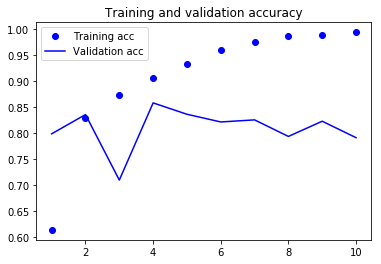

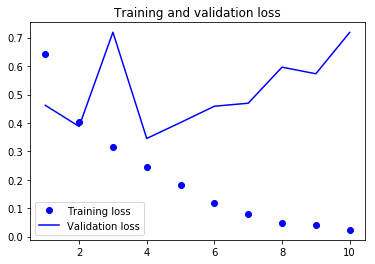

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Concrete LSTM example

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 7936/20000 [==========>...................] - ETA: 41s - loss: 0.6235 - acc: 0.6733

KeyboardInterrupt: 